"""
🧪 Developer Productivity AI: Behavioral and Performance Analysis
-------------------------------------------------------------

This notebook performs comprehensive exploratory data analysis and modeling on a dataset
simulating the productivity of AI developers. The data captures key behavioral, physiological,
and performance metrics from software development work over 500 days.

📦 Dataset Overview:
The dataset contains 500 daily snapshots of developer activity, including:
- hours_coding (Total hours spent on software development)
- coffee_intake_mg (Caffeine intake in milligrams)
- distractions (Number of distractions, e.g., meetings, notifications)
- sleep_hours (Hours of sleep from the previous night)
- commits (Number of code commits pushed)
- bugs_reported (Number of bugs reported)
- ai_usage_hours (AI tool usage, e.g., ChatGPT, Copilot)
- cognitive_load (Self-reported mental strain on a scale of 1–10)
- task_success (Whether the productivity goal was achieved, 0 = No, 1 = Yes)

🎯 Objectives:
- Perform detailed Exploratory Data Analysis (EDA) to uncover distribution patterns,
  correlations, and possible productivity indicators.
- Develop and evaluate machine learning models:
    - **Binary Classification**: Predict whether a developer will succeed in achieving the daily productivity goal
    - **Regression**: Predict cognitive load based on developer behaviors and inputs
    - **Clustering**: Identify groups of developers with similar behavioral patterns
    - **Visualization**: Use interactive and statistical plots to support pattern discovery

📚 Libraries Used:
- NumPy & Pandas: Data handling and transformation
- Seaborn & Matplotlib: Statistical and comparative visualizations
- Scikit-learn: ML models and evaluation (e.g., Random Forest, KMeans)
"""

###Import required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.cluster import KMeans
import plotly.express as px
import warnings  # Warning control
warnings.filterwarnings('ignore')


### Load Datasets

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/ai-developer-productivity-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ai-developer-productivity-dataset


In [8]:
df = pd.read_csv('/kaggle/input/ai-developer-productivity-dataset/ai_dev_productivity.csv')
df.head(10)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
5,4.53,429,1,7.1,5,0,3.06,3.9,1
6,8.16,600,1,8.3,6,0,0.30,2.2,1
7,6.53,600,4,3.6,9,3,1.47,9.1,0
8,4.06,409,5,6.1,6,2,2.43,7.0,0
9,6.09,567,5,7.3,7,0,2.11,5.1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [10]:
# Summary Statistics
# Display the summary statistics of the dataset, including count, mean, std, min, 25%, 50%, 75%, and max values for numerical columns
df.describe()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,5.015600,463.192000,2.976000,6.975800,4.60800,0.858000,1.510920,4.498200,0.606000
std,1.947253,142.334991,1.678409,1.455965,2.70499,1.102846,1.085557,1.868861,0.489124
min,0.000000,6.000000,0.000000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,3.600000,369.500000,2.000000,6.100000,3.00000,0.000000,0.697500,3.175000,0.000000
50%,5.030000,500.500000,3.000000,6.950000,5.00000,0.000000,1.260000,4.400000,1.000000
75%,6.275000,600.000000,4.000000,7.900000,6.00000,2.000000,2.070000,5.800000,1.000000
max,12.000000,600.000000,8.000000,10.000000,13.00000,5.000000,6.360000,10.000000,1.000000


###Exploratory Data Analysis (EDA)

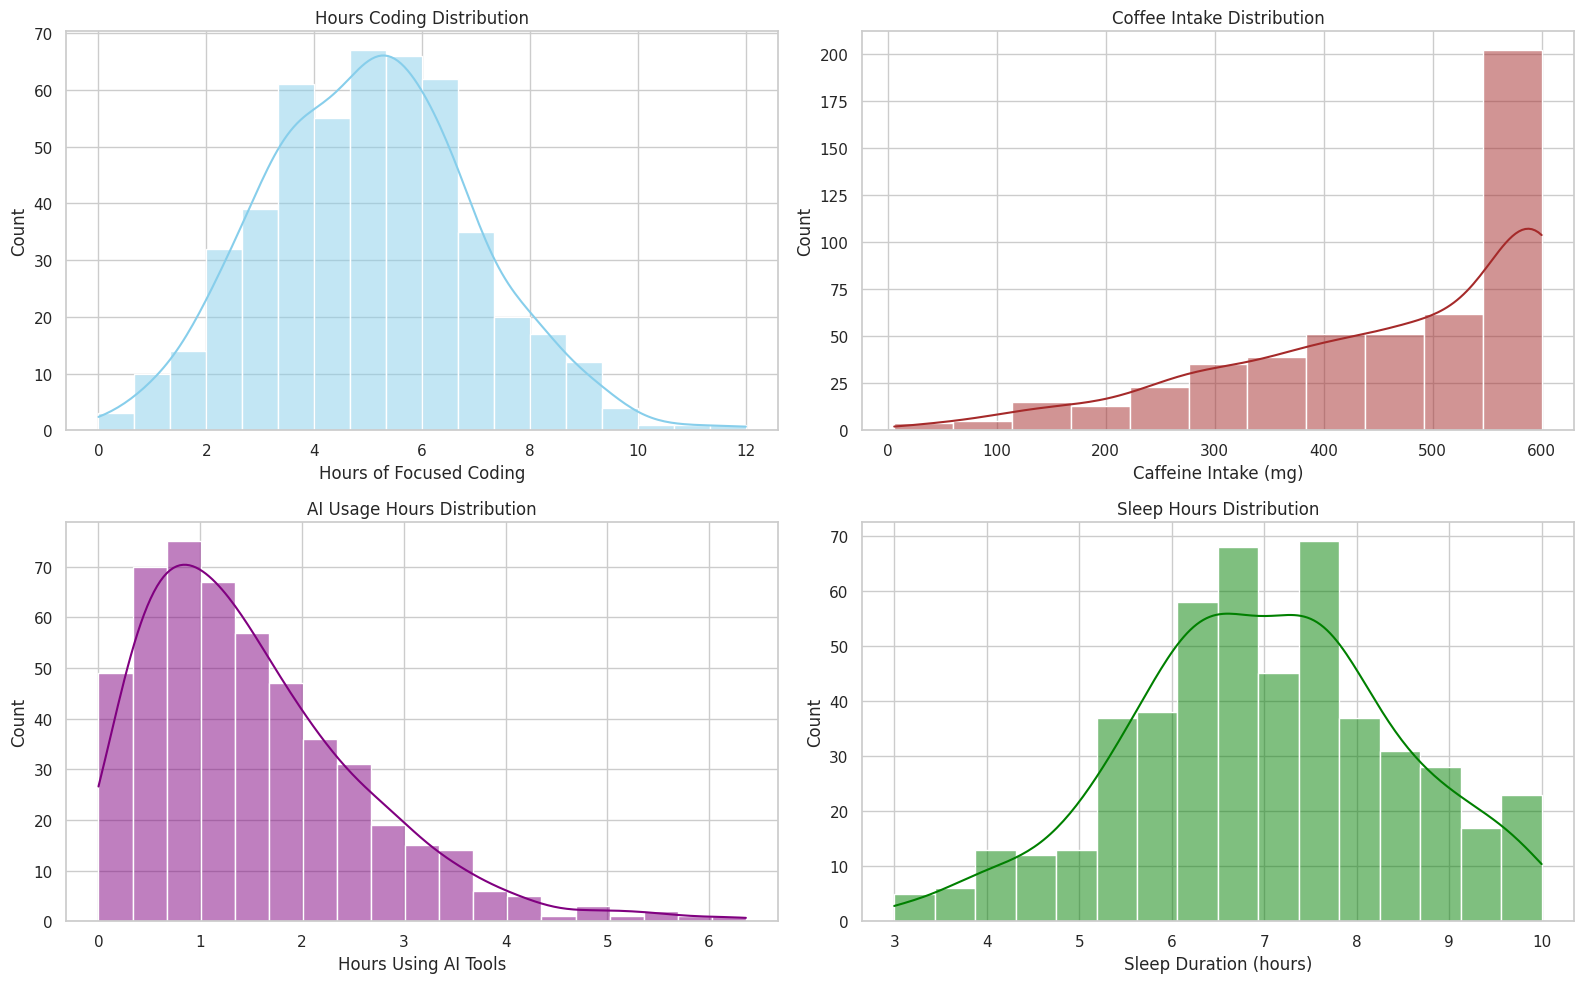

In [12]:
# --- Subplots: Distribution of Key Features ---
# This grid of histograms shows the distribution of productivity and physiological variables.
# It helps in understanding the range, skewness, and potential anomalies in each feature.

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# hours_coding
sns.histplot(df['hours_coding'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Hours Coding Distribution')
axes[0, 0].set_xlabel('Hours of Focused Coding')

# coffee_intake_mg
sns.histplot(df['coffee_intake_mg'], kde=True, ax=axes[0, 1], color='brown')
axes[0, 1].set_title('Coffee Intake Distribution')
axes[0, 1].set_xlabel('Caffeine Intake (mg)')

# ai_usage_hours
sns.histplot(df['ai_usage_hours'], kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('AI Usage Hours Distribution')
axes[1, 0].set_xlabel('Hours Using AI Tools')

# sleep_hours
sns.histplot(df['sleep_hours'], kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Sleep Hours Distribution')
axes[1, 1].set_xlabel('Sleep Duration (hours)')

plt.tight_layout()
plt.show()

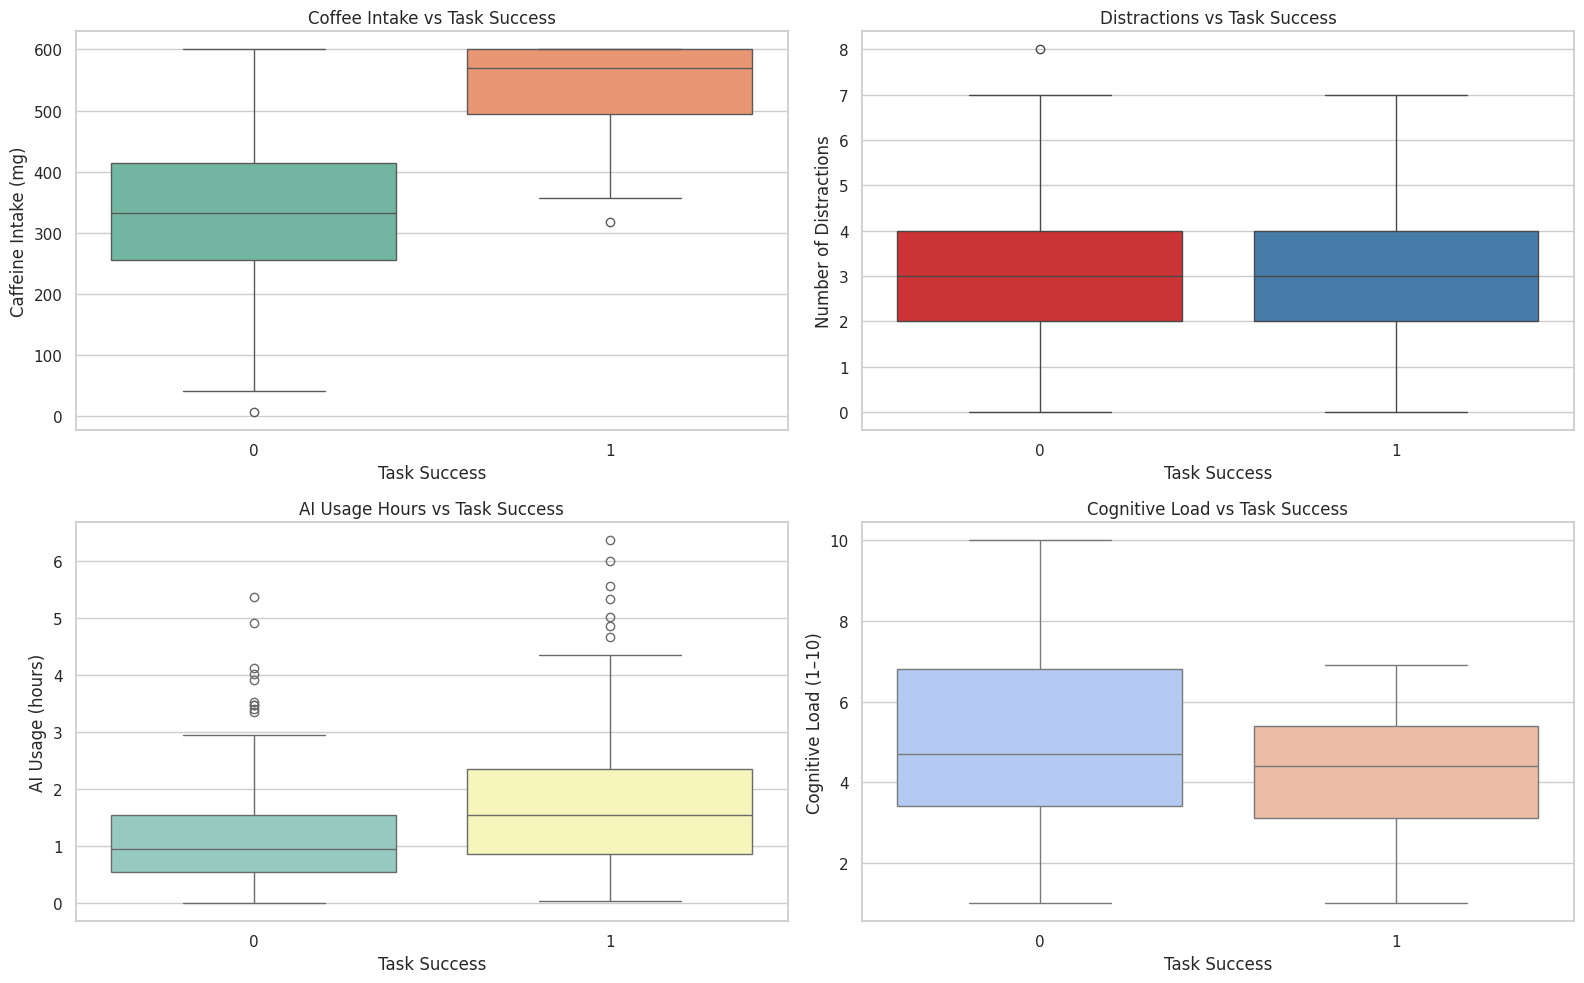

In [13]:
# --- Boxplots: Feature Distribution by Task Success ---
# These boxplots show how each feature varies with task success (0 = fail, 1 = success).
# Helps identify which variables have a strong relationship with productivity outcome.

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# coffee_intake_mg vs task_success
sns.boxplot(x='task_success', y='coffee_intake_mg', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Coffee Intake vs Task Success')
axes[0, 0].set_xlabel('Task Success')
axes[0, 0].set_ylabel('Caffeine Intake (mg)')

# distractions vs task_success
sns.boxplot(x='task_success', y='distractions', data=df, ax=axes[0, 1], palette='Set1')
axes[0, 1].set_title('Distractions vs Task Success')
axes[0, 1].set_xlabel('Task Success')
axes[0, 1].set_ylabel('Number of Distractions')

# ai_usage_hours vs task_success
sns.boxplot(x='task_success', y='ai_usage_hours', data=df, ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('AI Usage Hours vs Task Success')
axes[1, 0].set_xlabel('Task Success')
axes[1, 0].set_ylabel('AI Usage (hours)')

# cognitive_load vs task_success
sns.boxplot(x='task_success', y='cognitive_load', data=df, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Cognitive Load vs Task Success')
axes[1, 1].set_xlabel('Task Success')
axes[1, 1].set_ylabel('Cognitive Load (1–10)')

plt.tight_layout()
plt.show()

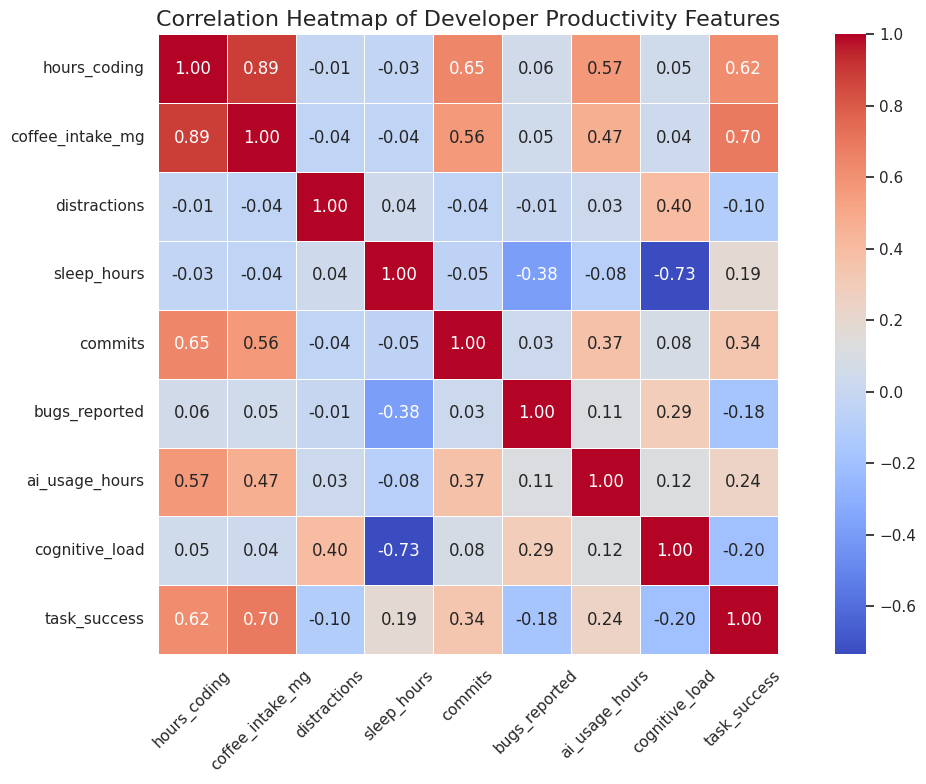

In [14]:
# --- Correlation Heatmap ---
# Shows pairwise correlation between all numerical variables.
# Useful to detect linear relationships and multicollinearity in the dataset.

plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Developer Productivity Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

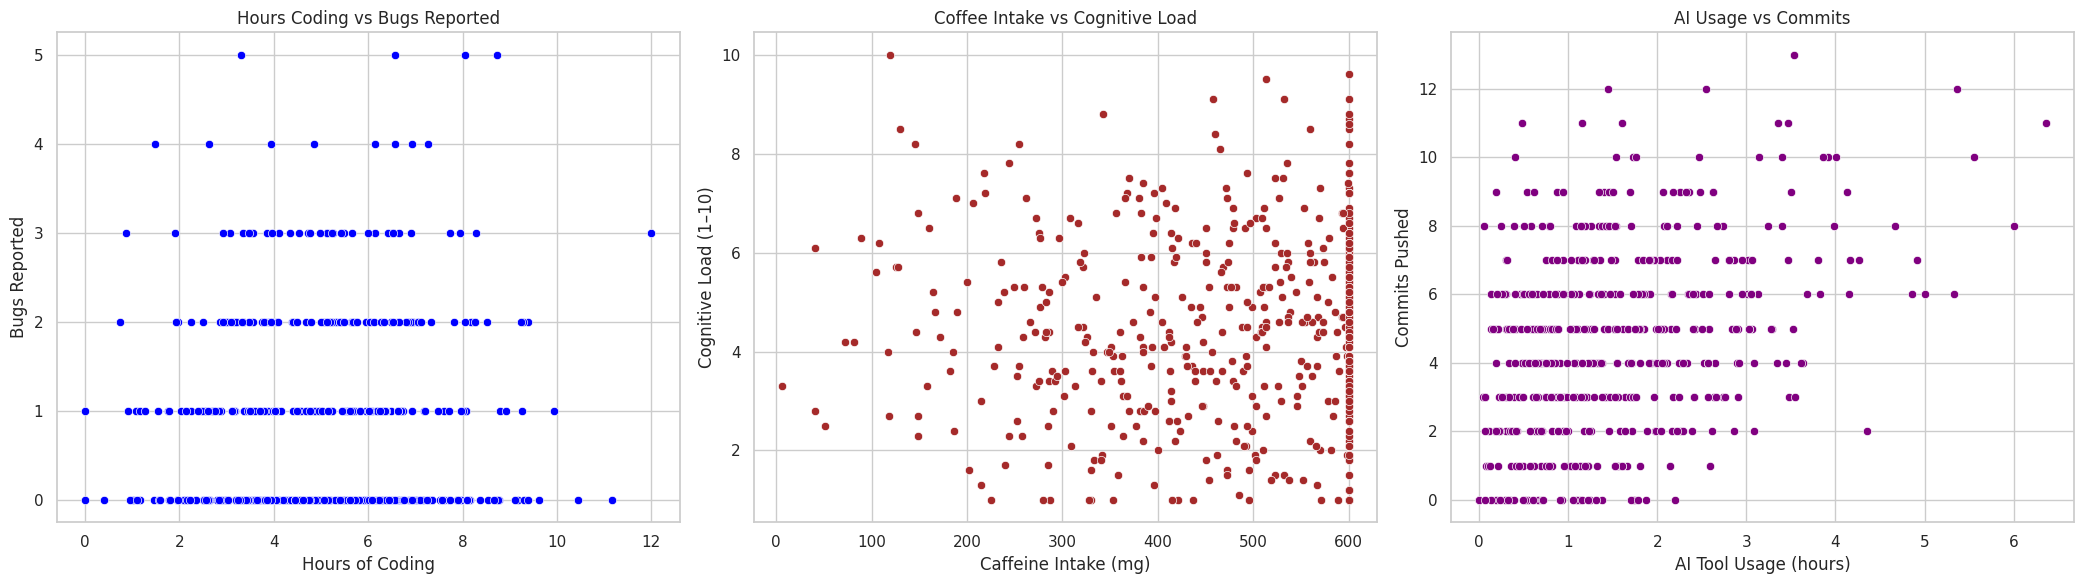

In [15]:
# --- Scatter Plots: Bivariate Feature Relationships ---
# These scatter plots help explore relationships between pairs of variables.
# Useful for understanding potential predictive interactions.

fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# hours_coding vs bugs_reported
sns.scatterplot(x='hours_coding', y='bugs_reported', data=df, ax=axes[0], color='blue')
axes[0].set_title('Hours Coding vs Bugs Reported')
axes[0].set_xlabel('Hours of Coding')
axes[0].set_ylabel('Bugs Reported')

# coffee_intake_mg vs cognitive_load
sns.scatterplot(x='coffee_intake_mg', y='cognitive_load', data=df, ax=axes[1], color='brown')
axes[1].set_title('Coffee Intake vs Cognitive Load')
axes[1].set_xlabel('Caffeine Intake (mg)')
axes[1].set_ylabel('Cognitive Load (1–10)')

# ai_usage_hours vs commits
sns.scatterplot(x='ai_usage_hours', y='commits', data=df, ax=axes[2], color='purple')
axes[2].set_title('AI Usage vs Commits')
axes[2].set_xlabel('AI Tool Usage (hours)')
axes[2].set_ylabel('Commits Pushed')

plt.tight_layout()
plt.show()

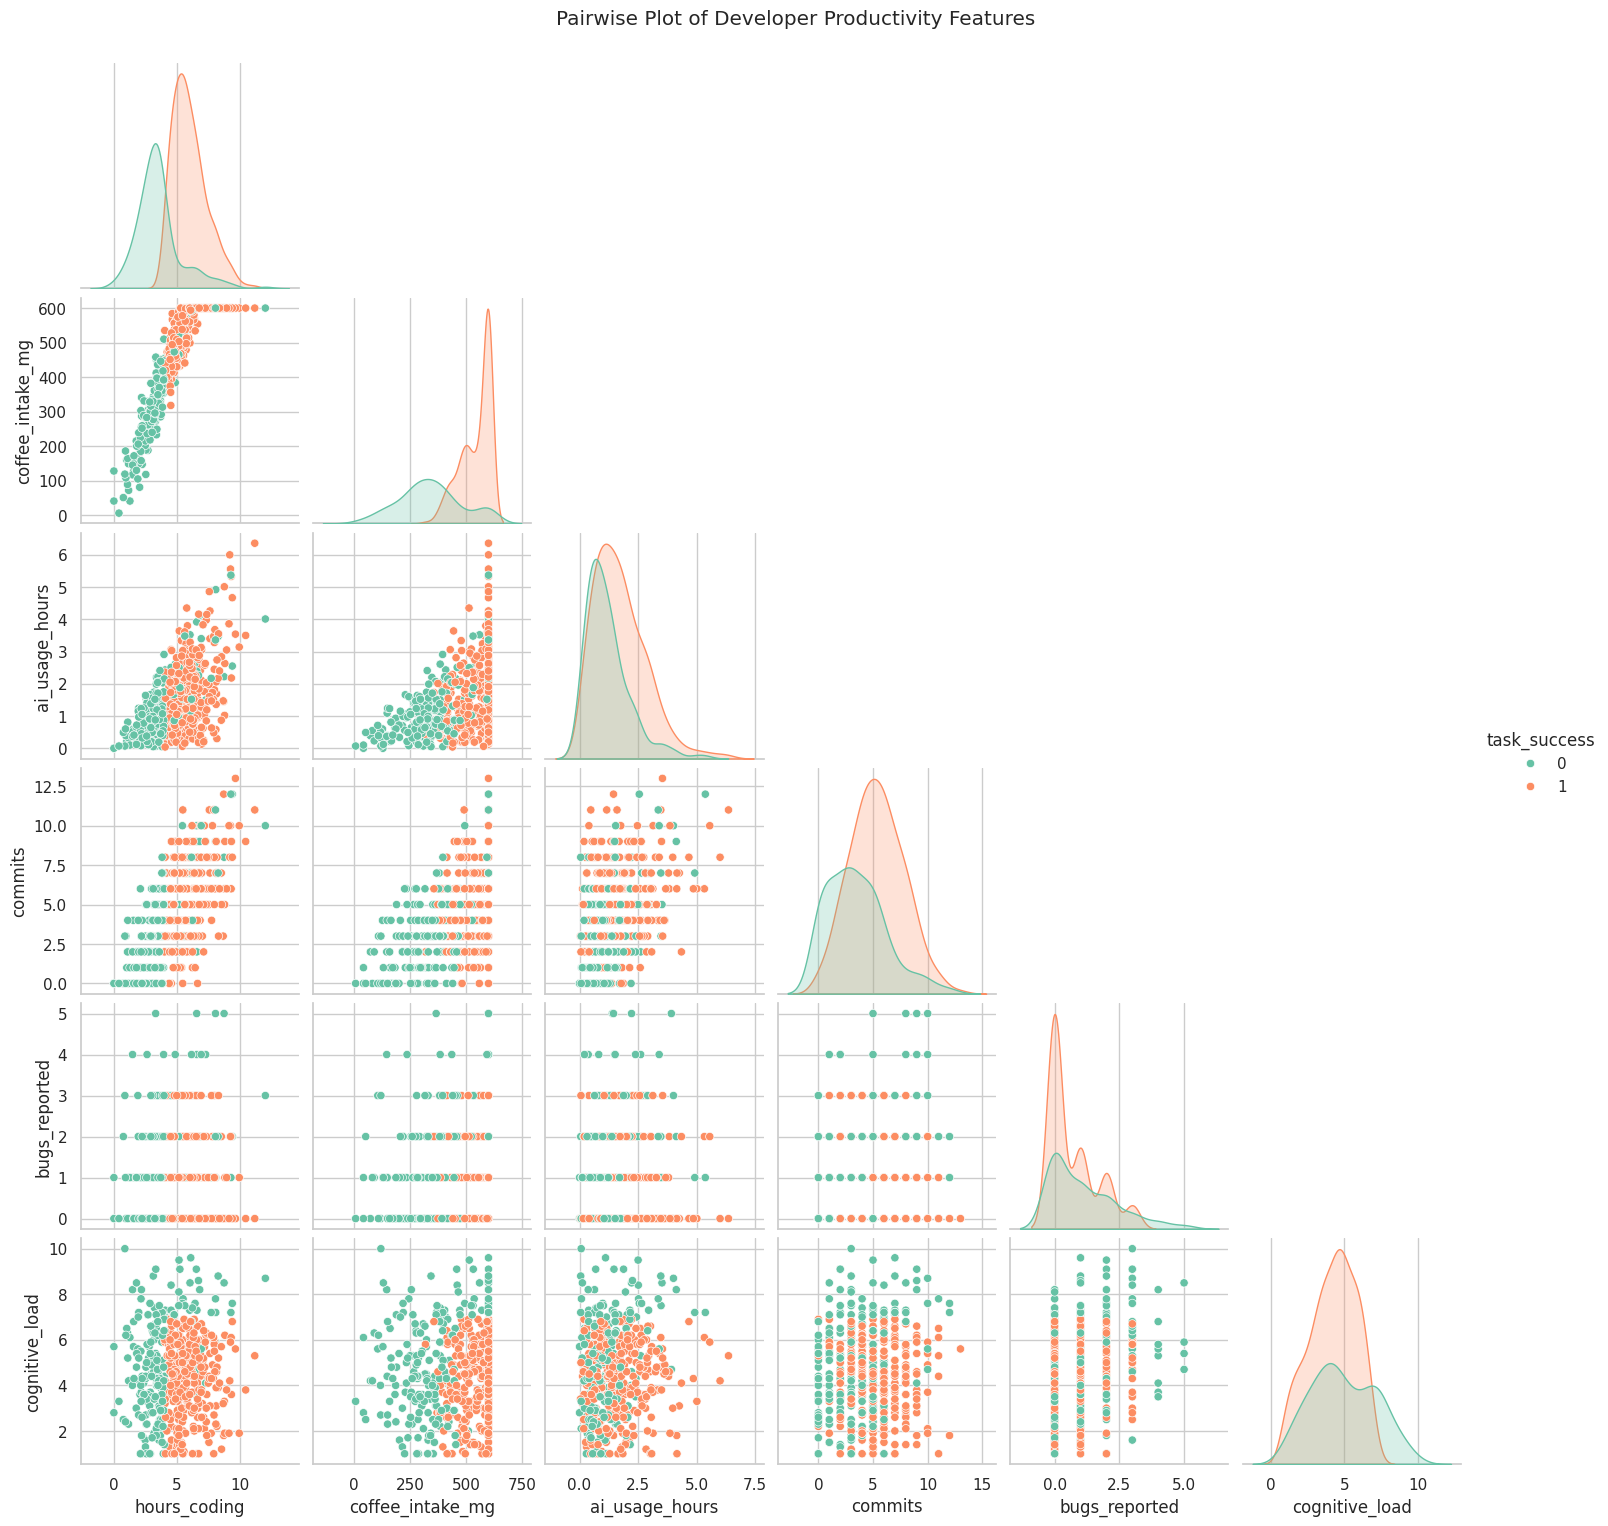

In [16]:
# --- Pairplot: Multivariate Relationship Exploration ---
# This pairplot helps visualize pairwise relationships across selected features.
# Ideal for spotting clusters, correlations, and distributions simultaneously.

import seaborn as sns

selected_features = [
    'hours_coding',
    'coffee_intake_mg',
    'ai_usage_hours',
    'commits',
    'bugs_reported',
    'cognitive_load',
    'task_success'
]

sns.pairplot(df[selected_features], hue='task_success', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Plot of Developer Productivity Features', y=1.02)
plt.show()


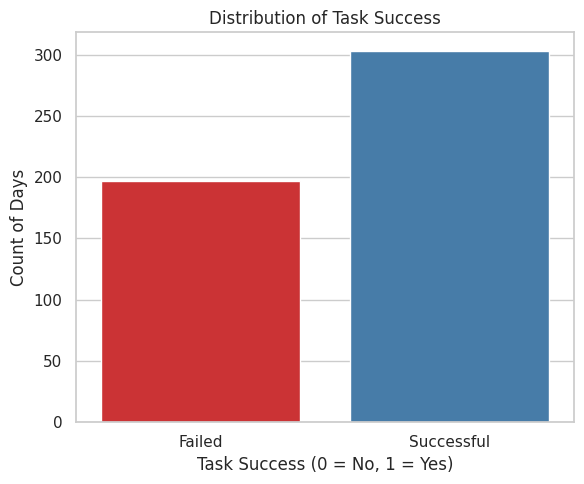

In [17]:
# --- Count Plot: Task Success Distribution ---
# This count plot shows how many days were productive (1) vs non-productive (0).
# Useful for checking class balance before classification.

plt.figure(figsize=(6, 5))
sns.countplot(x='task_success', data=df, palette='Set1')
plt.title('Distribution of Task Success')
plt.xlabel('Task Success (0 = No, 1 = Yes)')
plt.ylabel('Count of Days')
plt.xticks([0, 1], ['Failed', 'Successful'])
plt.tight_layout()
plt.show()

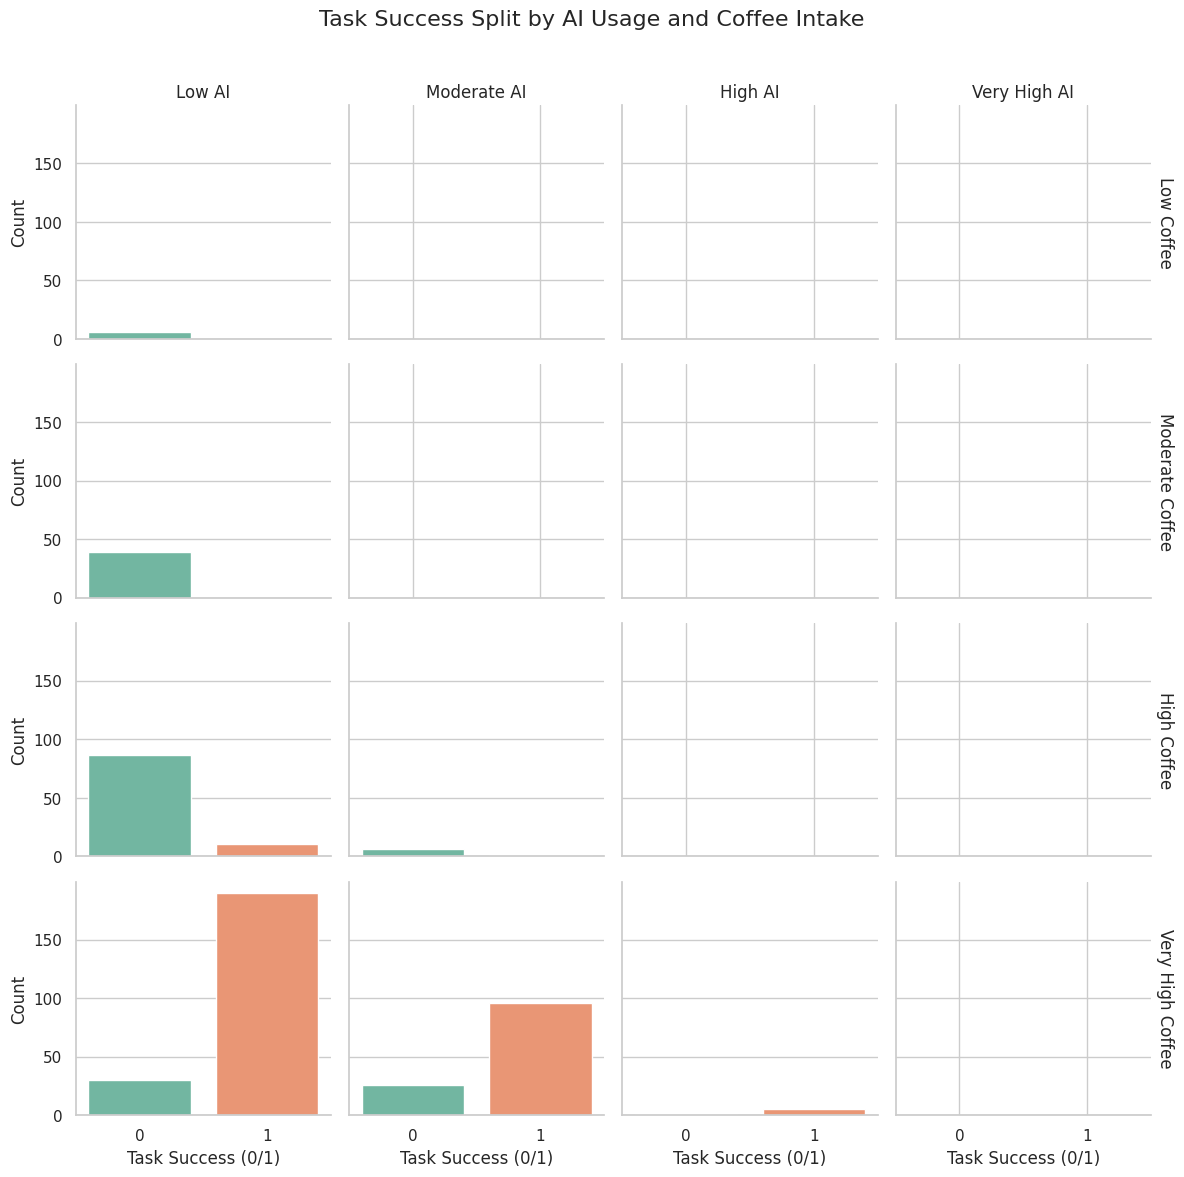

In [18]:
# --- Facet Grid: Task Success vs AI Usage and Coffee Intake ---
# This shows how task success distribution varies across different levels of AI usage and coffee intake.
# Great for detecting behavioral productivity patterns.

#  Bin AI usage and coffee intake for meaningful splits
df['ai_usage_bin'] = pd.cut(df['ai_usage_hours'], bins=[0, 2, 5, 8, 12], labels=['Low', 'Moderate', 'High', 'Very High'])
df['coffee_bin'] = pd.cut(df['coffee_intake_mg'], bins=[0, 100, 250, 400, 600], labels=['Low', 'Moderate', 'High', 'Very High'])

# Create FacetGrid
g = sns.FacetGrid(df, col="ai_usage_bin", row="coffee_bin", margin_titles=True)
g.map_dataframe(sns.countplot, x="task_success", palette="Set2")
g.set_axis_labels("Task Success (0/1)", "Count")
g.set_titles(row_template='{row_name} Coffee', col_template='{col_name} AI')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Task Success Split by AI Usage and Coffee Intake', fontsize=16)
plt.show()